In [42]:
import pandas as pd
import numpy as np

from pycaret.regression import *

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
train = pd.read_csv('G:/내 드라이브/Github/BigContest_Flood-ZERO/고경수/train.csv')
test = pd.read_csv('G:/내 드라이브/Github/BigContest_Flood-ZERO/고경수/test.csv')
submission = pd.read_csv('G:/내 드라이브/Github/BigContest_Flood-ZERO/고경수/submission.csv')

In [3]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.56875,6.3,7,7,7,8,2.54,122.541667,6.3,7,7,7,8,2.54,122.550000,6.4,7,7,8,8,2.54,122.675000,6.4,7,7,8,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.56250,6.4,7,8,7,8,2.53,122.550000,6.4,7,8,7,8,2.53,122.558333,7.3,7,8,10,10,2.53,122.667857,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.55625,7.3,7,9,7,8,2.53,122.558333,7.3,7,9,8,8,2.53,122.566667,8.2,7,9,10,11,2.53,122.660714,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,8,2.53,122.55625,8.2,7,10,8,8,2.53,122.566667,8.2,7,10,10,10,2.53,122.575000,11.3,9,10,15,14,2.53,122.653571,11.3,9,10,15,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2,7,12,8,10,2.53,122.55625,11.3,9,12,10,10,2.53,122.575000,11.3,9,12,10,11,2.53,122.575000,14.4,12,12,18,16,2.53,122.639286,14.4,12,12,18,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [4]:
train.corr()['유입량']

홍수사상번호    -0.376751
연         -0.349836
월         -0.116182
일          0.052061
시간         0.016276
유입량        1.000000
유역평균강수1    0.742268
강우A1       0.617424
강우B1       0.739951
강우C1       0.605588
강우D1       0.700568
수위E1       0.903840
수위D1       0.109475
유역평균강수2    0.752184
강우A2       0.615217
강우B2       0.743754
강우C2       0.626355
강우D2       0.700568
수위E2       0.903840
수위D2       0.124289
유역평균강수3    0.752184
강우A3       0.615217
강우B3       0.771063
강우C3       0.641773
강우D3       0.710927
수위E3       0.903840
수위D3       0.133473
유역평균강수4    0.760476
강우A4       0.612004
강우B4       0.771063
강우C4       0.619889
강우D4       0.722170
수위E4       0.903840
수위D4       0.084623
유역평균강수5    0.767842
강우A5       0.612004
강우B5       0.771063
강우C5       0.619889
강우D5       0.722170
수위E5       0.903840
수위D5       0.091073
유역평균강수6    0.790920
강우A6       0.612004
강우B6       0.767258
강우C6       0.669108
강우D6       0.727581
수위E6       0.903840
수위D6       0.097066
Name: 유입량, dtype: float64

In [5]:
유역평균강수 = ['유역평균강수1','유역평균강수2','유역평균강수3','유역평균강수4','유역평균강수5','유역평균강수6']
강우A = ['강우A1','강우A2','강우A3','강우A4','강우A5','강우A6']
강우B = ['강우B1','강우B2','강우B3','강우B4','강우B5','강우B6']
강우C = ['강우C1','강우C2','강우C3','강우C4','강우C5','강우C6']
강우D = ['강우D1','강우D2','강우D3','강우D4','강우D5','강우D6']
수위E = ['수위E1','수위E2','수위E3','수위E4','수위E5','수위E6']
수위D = ['수위D1','수위D2','수위D3','수위D4','수위D5','수위D6']

In [6]:
print(train[유역평균강수].mean())

유역평균강수1    68.196146
유역평균강수2    68.708745
유역평균강수3    68.708745
유역평균강수4    69.212519
유역평균강수5    67.435002
유역평균강수6    61.934329
dtype: float64


In [7]:
print(train[강우A].mean())

강우A1    79.865790
강우A2    83.111726
강우A3    83.111726
강우A4    84.734694
강우A5    84.734694
강우A6    84.734694
dtype: float64


In [8]:
print(train[강우B].mean())

강우B1    64.320996
강우B2    63.459011
강우B3    57.274991
강우B4    57.274991
강우B5    57.274991
강우B6    58.176064
dtype: float64


In [9]:
print(train[강우C].mean())

강우C1    40.029747
강우C2    39.464199
강우C3    39.700796
강우C4    51.492909
강우C5    51.492909
강우C6    39.168108
dtype: float64


In [10]:
print(train[강우D].mean())

강우D1    53.355240
강우D2    53.355240
강우D3    53.777240
강우D4    55.565202
강우D5    55.565202
강우D6    53.470771
dtype: float64


In [11]:
print(train[수위E].mean())

수위E1    4.583075
수위E2    4.583075
수위E3    4.583075
수위E4    4.583075
수위E5    4.583075
수위E6    4.583075
dtype: float64


In [12]:
print(train[수위D].mean())

수위D1    131.868337
수위D2    131.937138
수위D3    131.973432
수위D4    131.713814
수위D5    131.758356
수위D6    131.802854
dtype: float64


In [13]:
train['유역평균강수'] = train[유역평균강수].apply(np.mean , axis=1)
train['강우A'] = train[강우A].apply(np.mean ,axis=1)
train['강우B'] = train[강우B].apply(np.mean ,axis=1)
train['강우C'] = train[강우C].apply(np.mean ,axis=1)
train['강우D'] = train[강우D].apply(np.mean ,axis=1)
train['수위E'] = train[수위E].apply(np.mean ,axis=1)
train['수위D'] = train[수위D].apply(np.mean ,axis=1)

In [14]:
test['유역평균강수'] = test[유역평균강수].apply(np.mean , axis=1)
test['강우A'] = test[강우A].apply(np.mean ,axis=1)
test['강우B'] = test[강우B].apply(np.mean ,axis=1)
test['강우C'] = test[강우C].apply(np.mean ,axis=1)
test['강우D'] = test[강우D].apply(np.mean ,axis=1)
test['수위E'] = test[수위E].apply(np.mean ,axis=1)
test['수위D'] = test[수위D].apply(np.mean ,axis=1)

In [15]:
drops = [*유역평균강수,*강우A,*강우B,*강우C,*강우D,*수위E,*수위D]

train = train.drop(drops, axis=1)

In [16]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수,강우A,강우B,강우C,강우D,수위E,수위D
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.366667,7.000000,7.0,7.500000,8.000000,2.54,122.600903
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.833333,7.000000,8.0,8.500000,9.000000,2.53,122.597782
2,1.0,2006.0,7.0,10.0,10.0,251.424419,7.600000,7.000000,9.0,8.666667,9.500000,2.53,122.594661
3,1.0,2006.0,7.0,10.0,11.0,302.812199,9.600000,8.000000,10.0,11.666667,11.333333,2.53,122.592748
4,1.0,2006.0,7.0,10.0,12.0,384.783406,12.333333,10.166667,12.0,13.666667,13.166667,2.53,122.587423


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   홍수사상번호  2891 non-null   float64
 1   연       2891 non-null   float64
 2   월       2891 non-null   float64
 3   일       2891 non-null   float64
 4   시간      2891 non-null   float64
 5   유입량     2891 non-null   float64
 6   유역평균강수  2891 non-null   float64
 7   강우A     2891 non-null   float64
 8   강우B     2891 non-null   float64
 9   강우C     2891 non-null   float64
 10  강우D     2891 non-null   float64
 11  수위E     2891 non-null   float64
 12  수위D     2891 non-null   float64
dtypes: float64(13)
memory usage: 293.7 KB


In [18]:
train.corr()['유입량']

홍수사상번호   -0.376751
연        -0.349836
월        -0.116182
일         0.052061
시간        0.016276
유입량       1.000000
유역평균강수    0.764816
강우A       0.614808
강우B       0.765433
강우C       0.644750
강우D       0.718587
수위E       0.903840
수위D       0.106762
Name: 유입량, dtype: float64

In [19]:
train.loc[:, '수위D'].mean()

131.84232183473281

In [20]:
train.loc[:, '수위D'] = train.loc[:, '수위D']-131

In [21]:
train.corr()['유입량']

홍수사상번호   -0.376751
연        -0.349836
월        -0.116182
일         0.052061
시간        0.016276
유입량       1.000000
유역평균강수    0.764816
강우A       0.614808
강우B       0.765433
강우C       0.644750
강우D       0.718587
수위E       0.903840
수위D       0.106762
Name: 유입량, dtype: float64

In [22]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수,강우A,강우B,강우C,강우D,수위E,수위D
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.366667,7.000000,7.0,7.500000,8.000000,2.54,-8.399097
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.833333,7.000000,8.0,8.500000,9.000000,2.53,-8.402218
2,1.0,2006.0,7.0,10.0,10.0,251.424419,7.600000,7.000000,9.0,8.666667,9.500000,2.53,-8.405339
3,1.0,2006.0,7.0,10.0,11.0,302.812199,9.600000,8.000000,10.0,11.666667,11.333333,2.53,-8.407252
4,1.0,2006.0,7.0,10.0,12.0,384.783406,12.333333,10.166667,12.0,13.666667,13.166667,2.53,-8.412577


In [23]:
train.corr()['유입량']

홍수사상번호   -0.376751
연        -0.349836
월        -0.116182
일         0.052061
시간        0.016276
유입량       1.000000
유역평균강수    0.764816
강우A       0.614808
강우B       0.765433
강우C       0.644750
강우D       0.718587
수위E       0.903840
수위D       0.106762
Name: 유입량, dtype: float64

In [24]:
train.columns

Index(['홍수사상번호', '연', '월', '일', '시간', '유입량', '유역평균강수', '강우A', '강우B', '강우C',
       '강우D', '수위E', '수위D'],
      dtype='object')

In [25]:
x_train = train[['유역평균강수', '강우A', '강우B', '강우C','강우D', '수위E', '수위D','유입량']]
y_train = train['유입량']

x_test = test[['유역평균강수', '강우A', '강우B', '강우C','강우D', '수위E', '수위D']]

In [26]:
# model = cat

NameError: name 'cat' is not defined

In [ ]:
# model.fit(x_train, y_train)

In [ ]:
# pred = model.predict(x_test)

In [ ]:
# test['유입량'] = pred

In [ ]:
test[['유역평균강수', '강우A', '강우B', '강우C','강우D', '수위E', '수위D','유입량']]

In [27]:
reg = setup(session_id=1,
            data=x_train,
            target='유입량',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,1
1,Target,유입량
2,Original Data,"(2891, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2023, 7)"


In [28]:
rf = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,158.7843,142840.1607,377.9420,0.9692,0.1630,0.0994
1,215.4861,308022.0828,554.9974,0.9334,0.2274,0.1311
2,198.6736,204364.3687,452.0668,0.9668,0.2296,0.1483
3,163.3114,163382.0285,404.2054,0.9606,0.2174,0.1413
4,205.2930,237127.5901,486.9575,0.9599,0.1802,0.1111
Mean,188.3097,211147.2462,455.2338,0.9579,0.2035,0.1262
SD,22.9393,58400.5028,62.5254,0.0128,0.0269,0.0184


In [29]:
top5 = compare_models(sort='RMSE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,138.5878,83595.4422,282.4343,0.9824,0.2301,0.1621,3.0640
knn,K Neighbors Regressor,159.1736,123391.2094,343.0911,0.9747,0.2028,0.1231,0.0190
et,Extra Trees Regressor,137.6597,124948.5075,347.6692,0.9736,0.1578,0.0886,0.3890
rf,Random Forest Regressor,178.3785,189604.1323,427.1069,0.9603,0.1928,0.1185,0.5970
gbr,Gradient Boosting Regressor,237.8376,188723.9901,427.3070,0.9613,0.3438,0.2901,0.1950
lightgbm,Light Gradient Boosting Machine,198.2535,201650.0228,438.0510,0.9597,0.2596,0.1919,0.0920
dt,Decision Tree Regressor,219.6616,322470.5231,561.9987,0.9311,0.2523,0.1374,0.0430
ada,AdaBoost Regressor,661.3403,663982.7722,812.2362,0.8574,0.9817,2.0968,0.1240
lasso,Lasso Regression,595.4902,820933.0188,896.9517,0.8368,0.8890,1.1907,0.0120
ridge,Ridge Regression,595.7422,820786.0500,896.9591,0.8367,0.8938,1.1878,0.0090


In [30]:
blended_d = blend_models(top5, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,126.9323,90879.6564,301.4625,0.9700,0.1617,0.1012
1,140.8081,84371.1187,290.4671,0.9863,0.1719,0.1126
2,135.0110,83237.2789,288.5087,0.9768,0.1893,0.1213
3,209.7309,231810.5841,481.4671,0.9588,0.2236,0.1395
4,178.7306,141711.8545,376.4464,0.9813,0.2883,0.2160
5,150.9433,86904.4821,294.7957,0.9816,0.1964,0.1393
6,141.1762,121923.8941,349.1760,0.9609,0.2808,0.2176
7,122.7792,66850.4976,258.5546,0.9870,0.1875,0.1268
8,178.2674,117933.5530,343.4145,0.9780,0.1908,0.1325
9,139.3784,92237.6868,303.7066,0.9857,0.1792,0.1120


In [31]:
pred_holdouts = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
final_model_d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,149.1496,109119.4714,330.3324,0.9723,0.2117,0.1417


VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x000002481C14AC70>),
                            ('knn',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None, n_jobs=-1,
                                                 n_neighbors=5, p=2,
                                                 weights='uniform')),
                            ('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto'...
                                                       loss='ls', max_depth=3,
                                                       max_fea

In [32]:
top5[0]

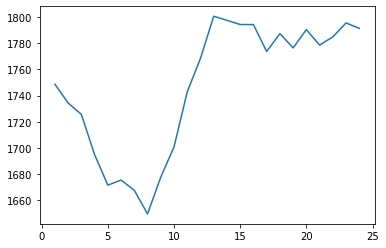

In [47]:
plt.plot(train.groupby('시간').mean()['유입량'])

In [48]:
train.groupby('연').count()['유입량']

연
2006.0    326
2007.0    115
2008.0     94
2009.0    292
2010.0    237
2011.0    709
2012.0    508
2013.0    413
2017.0    197
Name: 유입량, dtype: int64

In [49]:
train.groupby('연').mean()['유입량']

연
2006.0    4017.213124
2007.0    1787.957911
2008.0    2626.792297
2009.0    1942.528379
2010.0    1680.988421
2011.0    1661.749865
2012.0     983.644090
2013.0    1149.853317
2017.0     861.811295
Name: 유입량, dtype: float64